### Assignment-1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/content/drive/MyDrive/Internship/RoadSafety_Nov25/data/raw/US_Accidents_March23.csv')

1. How many unique values are there in categorical columns like `City`, `State`, and `Weather_Condition`? Which category is the most frequent in each?

In [ ]:
categorical_columns=["City","State","Weather_Condition"]
for column in categorical_columns:
  print(column)
  print("Unique values",df[column].nunique())
  print("Most_frequent category",df[column].mode()[0])
  print(df[column].value_counts().max())
  print("-"*30)

City
Unique values 13678
Most_frequent category Miami
186917
------------------------------
State
Unique values 49
Most_frequent category CA
1741433
------------------------------
Weather_Condition
Unique values 144
Most_frequent category Fair
2560802
------------------------------


2. Calculate the percentage of missing values in each column and list columns with more than 5% missing data.

In [ ]:
missing_percentage=(df.isnull().mean()*100)
print(missing_percentage)

columns_above_5=missing_percentage[missing_percentage>5]
print(columns_above_5)

ID                        0.000000
Source                    0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                  44.029355
End_Lng                  44.029355
Distance(mi)              0.000000
Description               0.000065
Street                    0.140637
City                      0.003274
County                    0.000000
State                     0.000000
Zipcode                   0.024779
Country                   0.000000
Timezone                  0.101030
Airport_Code              0.292881
Weather_Timestamp         1.555666
Temperature(F)            2.120143
Wind_Chill(F)            25.865904
Humidity(%)               2.253301
Pressure(in)              1.820288
Visibility(mi)            2.291524
Wind_Direction            2.267043
Wind_Speed(mph)           7.391355
Precipitation(in)        28.512858
Weather_Condition   

3. Convert `Start_Time` and `End_Time` columns to datetime objects. Find the range (earliest and latest) of accident start times in the dataset.

In [ ]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'],errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'],errors='coerce')

earliest = df['Start_Time'].min()
latest = df['Start_Time'].max()

print("Earliest accident time:", earliest)
print("Latest accident time:", latest)


Earliest accident time: 2016-01-14 20:18:33
Latest accident time: 2023-03-31 23:30:00


4. Identify any duplicate records in the dataset based on all columns. How many duplicates exist and how will you handle them?

In [ ]:
duplicates=df.duplicated()
num_duplicates=duplicates.sum()
print("Number of duplicates:",num_duplicates)
df_cleaned=df.drop_duplicates()
print("Shape of cleaned data:",df_cleaned.shape)

Number of duplicates: 0
Shape of cleaned data: (7728394, 46)


5. Explore the distribution of accident severity (Severity column). What percentage of accidents belong to each severity level? Visualize this distribution with a pie chart.

Severity Percentage:
 Severity
2    79.667017
3    16.812510
4     2.648804
1     0.871669
Name: count, dtype: float64


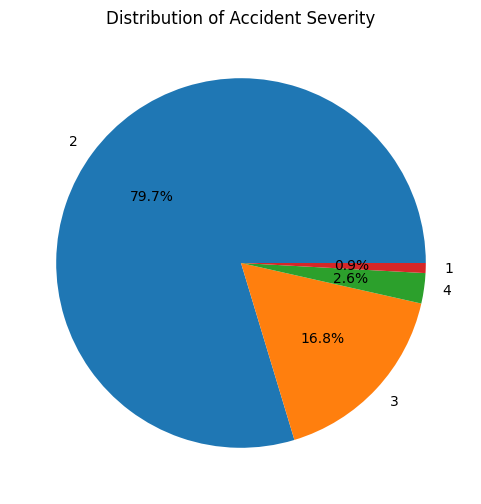

In [ ]:
severity_counts = df['Severity'].value_counts()
severity_percent = (severity_counts / len(df)) * 100

print("Severity Percentage:\n", severity_percent)

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(severity_counts, labels=severity_counts.index, autopct="%1.1f%%")
plt.title("Distribution of Accident Severity")
plt.show()
